## **Hotel Business Sentiment Predcition**

Project Details
==========
Sentiment prediction
====================
You have recently started hotel business and collected customer sentiments data from different sources which have similar type of business (train).

Currently customers are visiting your hotel and started dropping their reviews about your hotel and you have collected all the reviews up to data 
and you are clueless if those reviews represent positive or negative emotions (test).

Use case
========

You would need to build a system to predict if the reviews are positive/negative, so that you can address any issues which are in the form of negative feedback.

Apply every necessary steps/technique that are not only limited to,

1. Perform data cleaning.
2. EDA
3. Build multiple (ML) predictive models and choose the best based on relevant metrics
4. Use pipeline where necessary 
5. Create visualization charts that represents most common positive sentiments and negative sentiments.

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [148]:
import csv
train= pd.read_csv('/content/drive/My Drive/NLP/train.csv',error_bad_lines=False,engine="python")
train.head()

Skipping line 1124: unexpected end of data


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [149]:
test= pd.read_csv('/content/drive/My Drive/NLP/test.csv',error_bad_lines=False,engine="python")
test.head()

Skipping line 1180: unexpected end of data


,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


Data Cleaning

dropping unused columns which are irrelevant for this project. ie User_ID, Browser_Used, and Device_Used.

In [150]:
train.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [151]:
train = train.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'])
train.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [152]:
test = test.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'])
test.head()

,Description
0,Looking for a motel in close proximity to TV t...
1,Walking distance to Madison Square Garden and ...
2,Visited Seattle on business. Spent - nights in...
3,This hotel location is excellent and the rooms...
4,This hotel is awesome I love the service Antho...


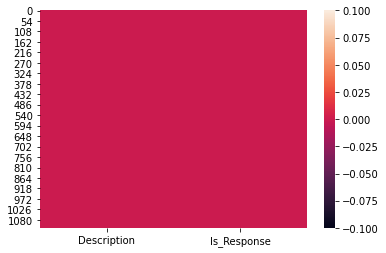

In [153]:
sns.heatmap(train.isnull())

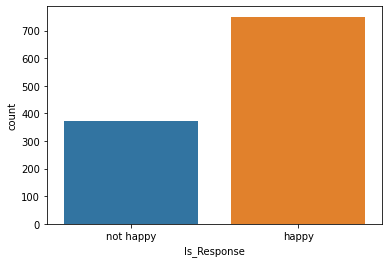

In [154]:
train['Is_Response'].value_counts()
sns.countplot(data=train,x='Is_Response')

In [155]:
# Changing Is_Response column values happy, not happy to positive and negative
#train['Is_Response'] = train['Is_Response'].map({'happy' : 'positive', 'not happy' : 'negative'})
#train.sample(3)

In [156]:
train['length']=train['Description'].str.len()
test['length']=test['Description'].str.len()
train.head()

,Description,Is_Response,length
0,The room was kind of clean but had a VERY stro...,not happy,248
1,I stayed at the Crown Plaza April -- - April -...,not happy,1077
2,I booked this hotel through Hotwire at the low...,not happy,1327
3,Stayed here with husband and sons on the way t...,happy,502
4,My girlfriends and I stayed here to celebrate ...,not happy,1613


In [157]:
#Lower case Conversion
train.Description=train.Description.str.lower()
test.Description=test.Description.str.lower()
import nltk
nltk.download('stopwords')

#Remove stopwords
stop_words=stopwords.words('english')
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in stop_words))


#Removing Punctuations
import string
train['Description']=train['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))

test['Description']=test['Description'].apply(lambda x: ' '.join(
word for word in x.split() if word not in string.punctuation))

#Removing more punctuations
train['Description']=train['Description'].str.replace(r'[^\w\d\s]',' ')

test['Description']=test['Description'].str.replace(r'[^\w\d\s]',' ')
#Remove extra spaces used with single space
train['Description']=train['Description'].str.replace(r'\s+]',' ')

test['Description']=test['Description'].str.replace(r'\s+]',' ')

#Remove leading and trailing spaces
train['Description']=train['Description'].str.replace(r'^\s+|\s+?$',' ')

test['Description']=test['Description'].str.replace(r'^\s+|\s+?$',' ')


#Clean_length after punctuations,stopwords removal
train['cleaned_length']=train['Description'].str.len()

test['cleaned_length']=test['Description'].str.len()
train.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description,Is_Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,not happy,248,144
1,stayed crown plaza april april st...,not happy,1077,714
2,booked hotel hotwire lowest price could find ...,not happy,1327,900
3,stayed husband sons way alaska cruise loved h...,happy,502,358
4,girlfriends stayed celebrate th birthdays p...,not happy,1613,1048


In [158]:
train['Description']

0       room kind clean strong smell dogs  generally a...
1       stayed crown plaza april    april           st...
2       booked hotel hotwire lowest price could find  ...
3       stayed husband sons way alaska cruise  loved h...
4       girlfriends stayed celebrate   th birthdays  p...
                              ...                        
1117    nice stay hgits  rooms large nyc kept clean  p...
1118    every year family comes chicago enjoy city hol...
1119    partner stayed hotel october    celebrate   th...
1120    yotel better expected  room clean  well brekfa...
1121    stayed one night business  would rate actual h...
Name: Description, Length: 1122, dtype: object

In [159]:
#Label coding 0 and 1
train['Is_Response'].replace({'happy':0,'not happy':1},inplace=True)
train

,Description,Is_Response,length,cleaned_length
0,room kind clean strong smell dogs generally a...,1,248,144
1,stayed crown plaza april april st...,1,1077,714
2,booked hotel hotwire lowest price could find ...,1,1327,900
3,stayed husband sons way alaska cruise loved h...,0,502,358
4,girlfriends stayed celebrate th birthdays p...,1,1613,1048
...,...,...,...,...
1117,nice stay hgits rooms large nyc kept clean p...,0,632,429
1118,every year family comes chicago enjoy city hol...,0,943,631
1119,partner stayed hotel october celebrate th...,0,1319,799
1120,yotel better expected room clean well brekfa...,0,153,98


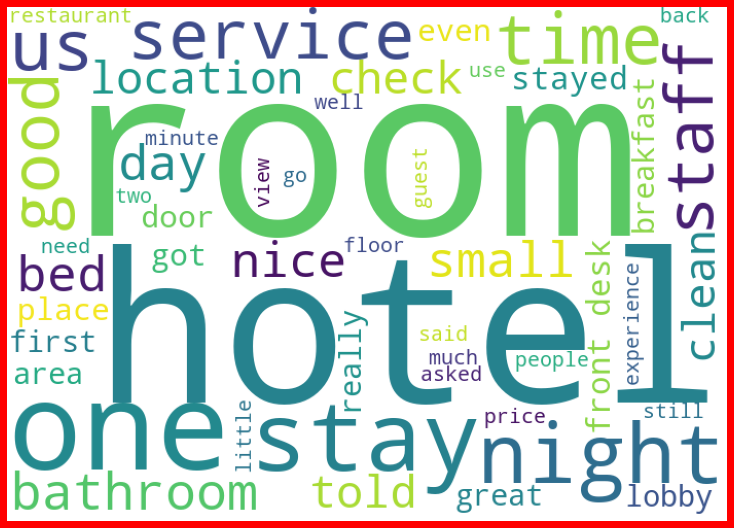

In [160]:
#Loud words in 'not happy' 
from wordcloud import WordCloud

NotHappy = train['Description'][train['Is_Response']==1]

NotHappy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(NotHappy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(NotHappy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

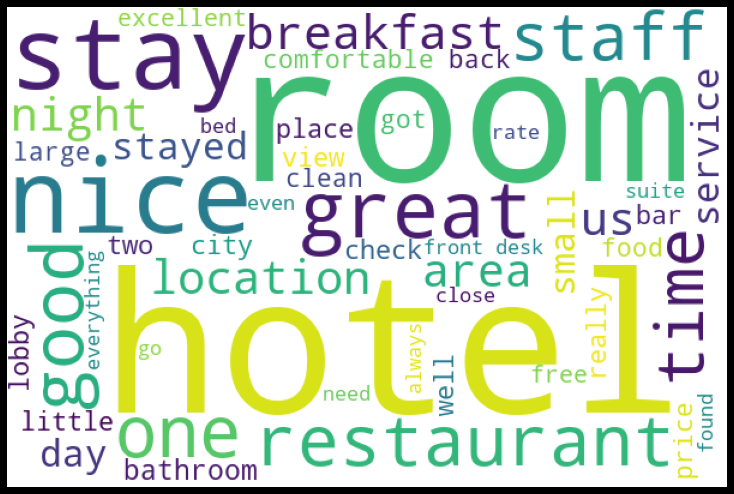

In [161]:
#Loud words in happy

happy = train['Description'][train['Is_Response']==0]
happy_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(happy))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [162]:
#Vectorize 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(train['Description'])
X = features
y = train['Is_Response']


In [163]:
X.shape

(1122, 8953)

In [164]:
y.shape

(1122,)

In [167]:
from sklearn.model_selection import train_test_split
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
X_train.shape,x_test.shape,Y_train.shape,y_test.shape


((841, 8953), (281, 8953), (841,), (281,))

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [168]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
model=[LogisticRegression(),MultinomialNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.7900355871886121
[[184   3]
 [ 56  38]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       187
           1       0.93      0.40      0.56        94

    accuracy                           0.79       281
   macro avg       0.85      0.69      0.71       281
weighted avg       0.82      0.79      0.76       281


 
0.6868327402135231
[[187   0]
 [ 88   6]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       187
           1       1.00      0.06      0.12        94

    accuracy                           0.69       281
   macro avg       0.84      0.53      0.46       281
weighted avg       0.79      0.69      0.58       281


 
0.800711743772242
[[183   4]
 [ 52  42]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87       187
           1       0.91      0.45      0.60        94

    accuracy                           0.80       2

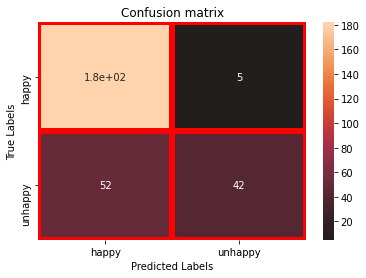

In [169]:
# confusion matrix heatmap
conf_mat = confusion_matrix(y_test,predm)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['happy','unhappy'])
ax.yaxis.set_ticklabels(['happy','unhappy'])
plt.show()

In [170]:
conf_mat

array([[182,   5],
       [ 52,  42]])